In [3]:
#Importing Libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,Lambda
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Defining the image size as VGG16 has got trained in image size of (224,224)
IMAGE_SIZE=[224,224]

In [5]:
#Saving the data location path in variables
df_train='/content/drive/MyDrive/1_model_Building/training_set/training_set'
df_test='/content/drive/MyDrive/1_model_Building/test_set/test_set'

In [6]:
#Importing the VGG16 model and removing the last layer "include_top=False"
#We have to remove the last layer because we need to predict for 2 classes and VGG16 is 1000 class classification model
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [7]:
#Setting the weight updation of all layers as False as we will not train them
for layers in vgg.layers:
  layers.trainable=False

In [8]:
#Flattening the output of VGG16 model
x=Flatten()(vgg.output)

In [9]:
#Adding a dense layer for prediction
prediction=Dense(2,activation='sigmoid')(x)

In [10]:
#Instantiating a model
model=Model(inputs=vgg.input,outputs=prediction)

In [11]:
#Understanding the parameters of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
#Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#setting the parameters for train dataset
train_data=ImageDataGenerator(rescale=(1/255.0),
                              zoom_range=0.2,
                              rotation_range=0.2,
                              horizontal_flip=True,
                              shear_range=0.1)

In [14]:
#setting the parameters for test dataset 
test_data=ImageDataGenerator(rescale=(1/255.0))

In [15]:
#Creating more images using ImageDataGenerator class
training=train_data.flow_from_directory(directory='/content/drive/MyDrive/1_model_Building/training_set/training_set', target_size=(224,224), 
                                           classes=['cats', 'dogs'], batch_size=10, shuffle=False)
testing=test_data.flow_from_directory(directory= '/content/drive/MyDrive/1_model_Building/test_set/test_set', target_size=(224,224), classes=['cats', 'dogs'], 
                                       batch_size=10, shuffle=False)




Found 1862 images belonging to 2 classes.
Found 502 images belonging to 2 classes.


In [16]:
#fitting the model
answer=model.fit(training,validation_data=testing,epochs=2,steps_per_epoch=len(training),validation_steps=len(testing))

Epoch 1/2
187/187 [==============================] - 1233s 7s/step - loss: 0.7464 - accuracy: 0.7062 - val_loss: 0.2972 - val_accuracy: 0.8725
Epoch 2/2
187/187 [==============================] - 1232s 7s/step - loss: 0.3449 - accuracy: 0.8625 - val_loss: 0.2801 - val_accuracy: 0.8805


In [17]:
#Checking the keys stored in the variable answer
answer.history.keys

<function dict.keys>

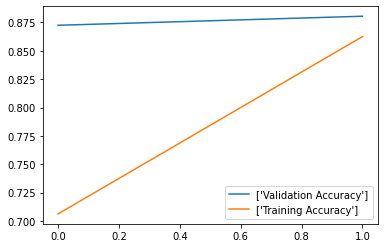

In [18]:
#Plotting the training accuracy and validation accuracy graphs
plt.plot(answer.history['val_accuracy'],label=['Validation Accuracy'])
plt.plot(answer.history['accuracy'],label=['Training Accuracy'])
plt.legend()

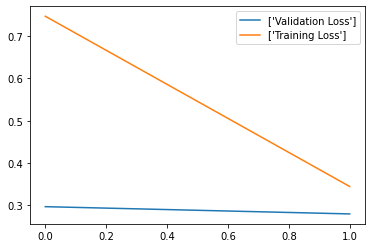

In [19]:
#plotting the training and validation loss graphs
plt.plot(answer.history['val_loss'],label=['Validation Loss'])
plt.plot(answer.history['loss'],label=['Training Loss'])
plt.legend()

In [20]:
#predicting using the model on the test data
y_pred=model.predict(testing)

In [22]:
#Storing the true values
y_test=testing.classes

In [23]:
#Getting the classification report
report =classification_report(y_true=testing.classes, y_pred=np.argmax(y_pred, axis=-1))
print(report)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       262
           1       0.91      0.83      0.87       240

    accuracy                           0.88       502
   macro avg       0.88      0.88      0.88       502
weighted avg       0.88      0.88      0.88       502



[[243  19]
 [ 41 199]]


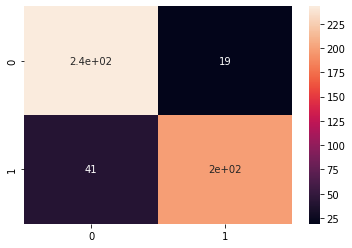

In [24]:
#Plotting the confusion matrix
cm = confusion_matrix(y_true=testing.classes, y_pred=np.argmax(y_pred, axis=-1))
sns.heatmap(cm,annot=True)
print(cm)

**Predicting using the model**

dog




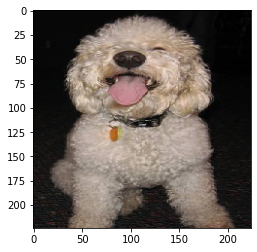

In [25]:
dat = '/content/drive/MyDrive/1_model_Building/test_set/test_set/cats/cat.4003.jpg' # For cat images
dat1 = '/content/drive/MyDrive/1_model_Building/test_set/test_set/dogs/dog.4003.jpg' # For Dog images

import numpy as np
from keras.preprocessing import image
test1 = image.load_img(dat1, target_size = (224, 224)) # Change when directory change 

test= image.load_img(dat1, target_size = (224, 224)) # Change when directory change 
test= image.img_to_array(test)
test = np.expand_dims(test, axis = 0)
result = model.predict(test)
training.class_indices
if result[0][0] == 1:
  prediction = 'cat'
else:
  prediction = 'dog'

print(prediction)
print('\n')
plt.imshow(test1)

In [26]:
model.save('model.h5')